# Data Exploriation

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

In [5]:
train = pd.read_csv('titanic_train.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


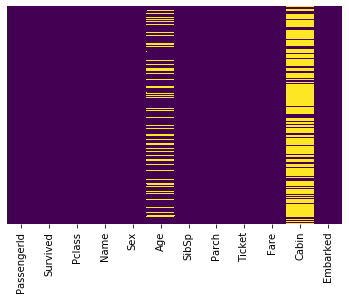

In [14]:
sns.heatmap(train.isnull(),cbar=False, cmap='viridis',yticklabels=False)

We can know that data in Age column has more or less 20% NaN value. And this data loss is much more serious in Cabin column.

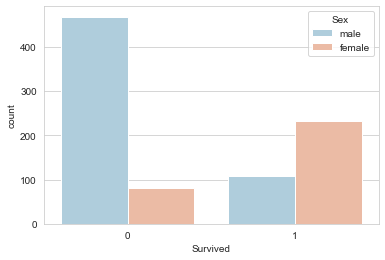

In [35]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')

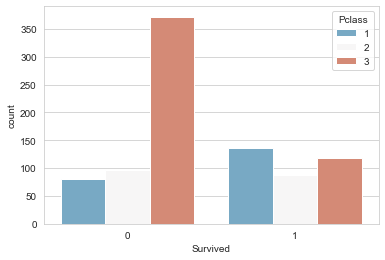

In [36]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train,palette='RdBu_r')

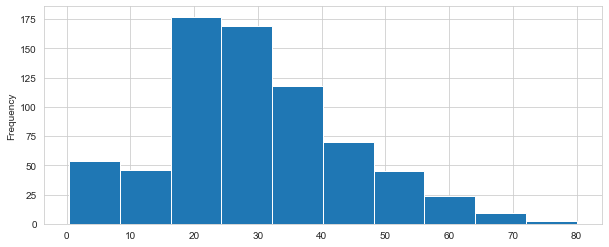

In [57]:
plt.figure(figsize=(10,4))
train['Age'].dropna().plot.hist(bins=10)

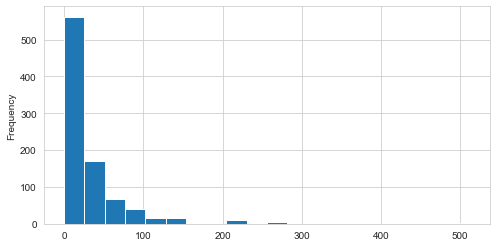

In [54]:
plt.figure(figsize=(8,4))
train['Fare'].plot.hist(bins=20)

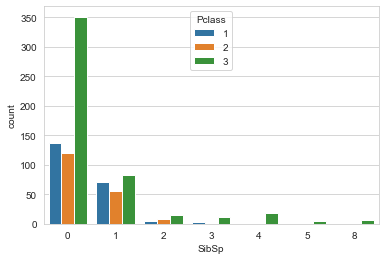

In [67]:
sns.countplot(x='SibSp', data=train, hue='Pclass')

# Data Cleaning

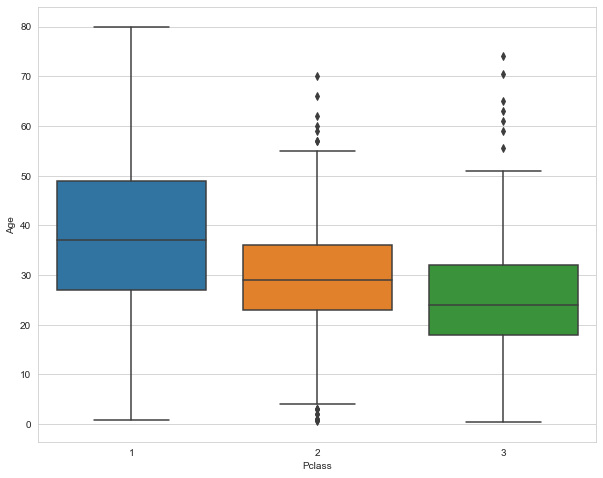

In [79]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Pclass',y='Age', data=train)

In [82]:
def impute_ages(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
    

In [91]:
train['Age'] = train[['Age','Pclass']].apply(impute_ages,axis=1)

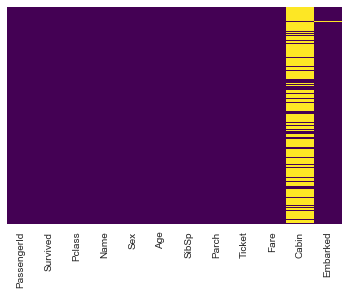

In [100]:
sns.heatmap(train.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [101]:
train.drop('Cabin',axis=1,inplace=True)

In [102]:
train.dropna(inplace=True)

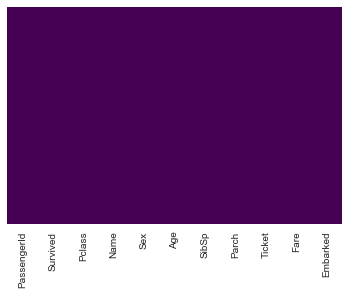

In [103]:
sns.heatmap(train.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [104]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [110]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [126]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [134]:
train.drop(columns=['Name','Ticket','Sex','Embarked'], inplace=True)

In [135]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [136]:
train = pd.concat([train,embark,sex],axis=1)

In [137]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,1,0,3,22.0,1,0,7.2500,0,1,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,1,0
3,4,1,1,35.0,1,0,53.1000,0,1,0
4,5,0,3,35.0,0,0,8.0500,0,1,1


# Fitting the model

In [141]:
from sklearn.model_selection import train_test_split
X = train.drop('Survived', axis=1)
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [142]:
X_train.shape

(622, 9)

In [145]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=200)
logmodel.fit(X_train,y_train)

D:\Lab\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [149]:
predications = logmodel.predict(X_test)

Evaluation

In [150]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,predications))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87       163
           1       0.84      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



In [155]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predications))

[[149  14]
 [ 32  72]]
